# Plot grafs and base map
Import functions and load data

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy import signal

In [2]:
FAC = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_filter.pkl')
DNS = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/DNS.pkl')
Half_orbit = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/half_orbit_and_omni.pkl')

### Plot the the data

<IPython.core.display.Javascript object>


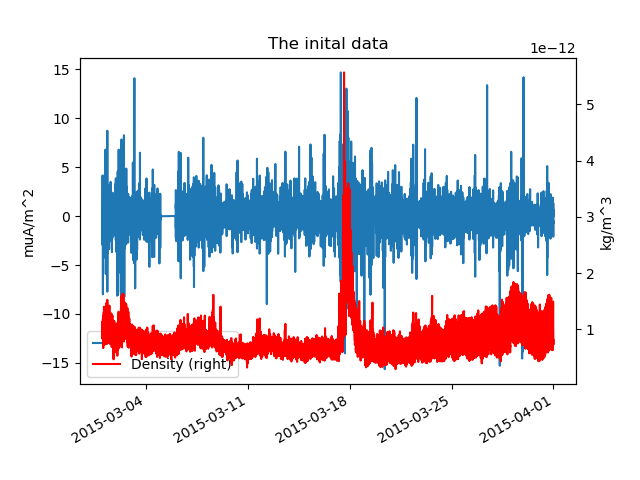

Text(0.5,1,'The inital data')

In [3]:
plt.figure()

p1 = FAC.FAC.plot(legend=True)
p2 = DNS.Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('muA/m^2')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('The inital data')

<IPython.core.display.Javascript object>


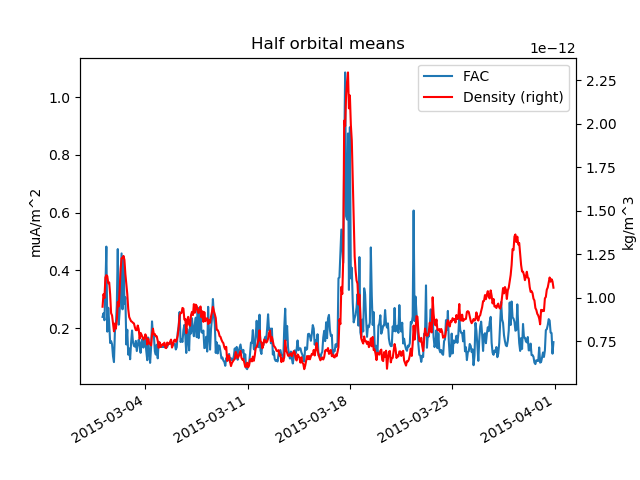

Text(0.5,1,'Half orbital means')

In [11]:
plt.figure()

p1 = Half_orbit[Half_orbit.Hemisphere==1].FAC.plot(legend=True)
p2 = Half_orbit[Half_orbit.Hemisphere==1].Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('muA/m^2')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('Half orbital means')

In [44]:
DNS.head(10)

,Altitude,Latitude,Longitude,Local_solar_time,Density,Orbit_nr,Hemisphere
2015-03-01 00:00:10,467092.145535,85.117592,105.579979,6.833068,8.285023e-13,0.0,1.0
2015-03-01 00:00:20,467073.571848,84.569942,109.177030,7.075650,8.265684e-13,0.0,1.0
2015-03-01 00:00:30,467051.715982,84.004519,112.099728,7.273275,8.293079e-13,0.0,1.0
2015-03-01 00:00:40,467026.594584,83.425904,114.507952,7.436601,8.313648e-13,0.0,1.0
2015-03-01 00:00:50,466998.224698,82.837286,116.518385,7.573408,8.357428e-13,0.0,1.0
2015-03-01 00:01:00,466966.628291,82.240936,118.216842,7.689417,8.413036e-13,0.0,1.0
2015-03-01 00:01:10,466931.827338,81.638502,119.667193,7.788885,8.491840e-13,0.0,1.0
2015-03-01 00:01:20,466893.845146,81.031205,120.917613,7.875024,8.586613e-13,0.0,1.0
2015-03-01 00:01:30,466852.709861,80.419963,122.004938,7.950291,8.660331e-13,0.0,1.0
2015-03-01 00:01:40,466808.449034,79.805481,122.957715,8.016587,8.708265e-13,0.0,1.0


## Geomagnetic active periods

<IPython.core.display.Javascript object>


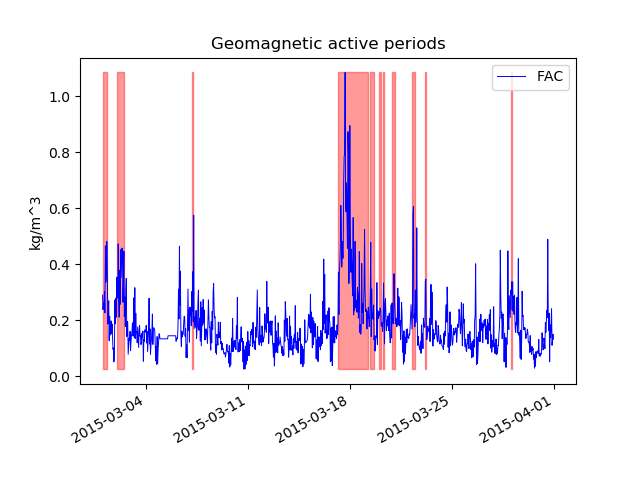

Text(0.5,1,'Geomagnetic active periods')

In [4]:
active = np.ones(len(Half_orbit.Kp))
active[Half_orbit.Kp<4] = float('NaN')
max_dens = max(Half_orbit.FAC)
min_dens = min(Half_orbit.FAC)
plt.figure()

p1 = Half_orbit.FAC.plot( style='b',legend=True,linewidth=0.7)
p1.fill_between(Half_orbit.index,max_dens* active, np.zeros(len(active))+min_dens, color='r', alpha=0.4)
p1.set_ylabel('kg/m^3')
plt.title('Geomagnetic active periods')


<IPython.core.display.Javascript object>


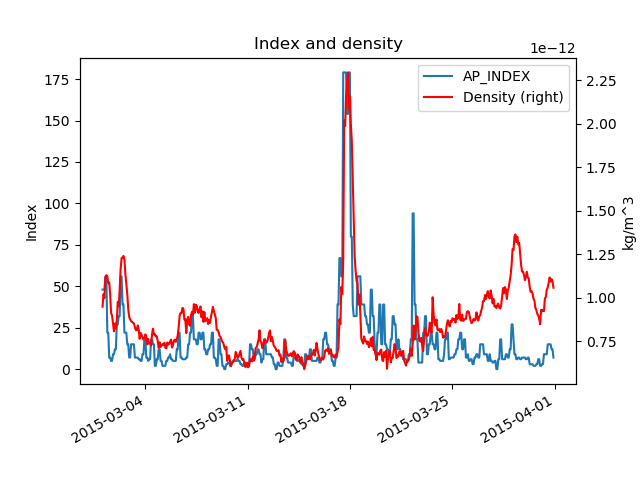

Text(0.5,1,'Index and density')

In [15]:
plt.figure()

p1 = Half_orbit[Half_orbit.Hemisphere==1].AP_INDEX.plot(legend=True)
p2 = Half_orbit[Half_orbit.Hemisphere==1].Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('Index')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('Index and density')

In [11]:
Half_orbit.head()

,FAC_A,FAC_C,ap,Density,Orbit_nr,Hemisphere,AP_INDEX,F10_INDEX,BZ_GSE,DST
2015-03-01 00:45:55,0.394035,0.395206,7.0,9.046159e-13,0.0,-1.0,48.0,125.300003,-0.8,-24.0
2015-03-01 01:32:50,0.327109,0.303314,15.0,9.488591e-13,1.0,1.0,48.0,125.300003,2.4,-34.0
2015-03-01 02:19:45,0.424904,0.420610,15.0,1.010551e-12,1.0,-1.0,48.0,125.300003,0.1,-20.0
2015-03-01 03:06:40,0.278338,0.254515,15.0,1.020605e-12,2.0,1.0,48.0,125.300003,-3.7,-20.0
2015-03-01 03:53:30,0.420675,0.476124,15.0,9.270029e-13,2.0,-1.0,48.0,125.300003,-3.7,-20.0


### Basemap plot of one orbit

In [17]:
orbit_values = FAC[(FAC.Orbit_nr>10) & (FAC.Orbit_nr<16) & (FAC.Hemisphere==1)]
dens_orbit = DNS[(DNS.Orbit_nr>10) & (DNS.Orbit_nr<16)]

<IPython.core.display.Javascript object>


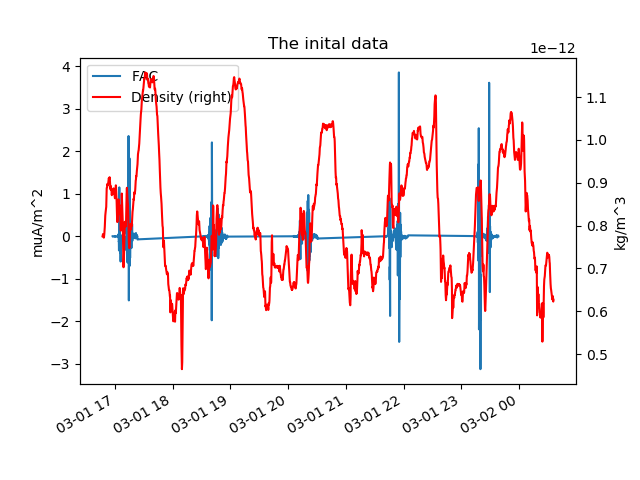

Text(0.5,1,'The inital data')

In [18]:
plt.figure()
p1 = orbit_values.FAC.plot(legend=True)
p2 = dens_orbit.Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('muA/m^2')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('The inital data')


In [19]:
plot_data = orbit_values.rolling(window=20,center=False).mean()

<IPython.core.display.Javascript object>


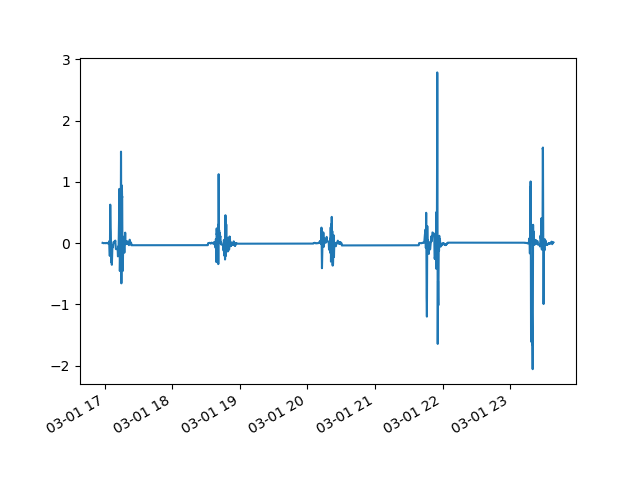

In [20]:
plt.figure()
plot_data.FAC.plot()

<IPython.core.display.Javascript object>


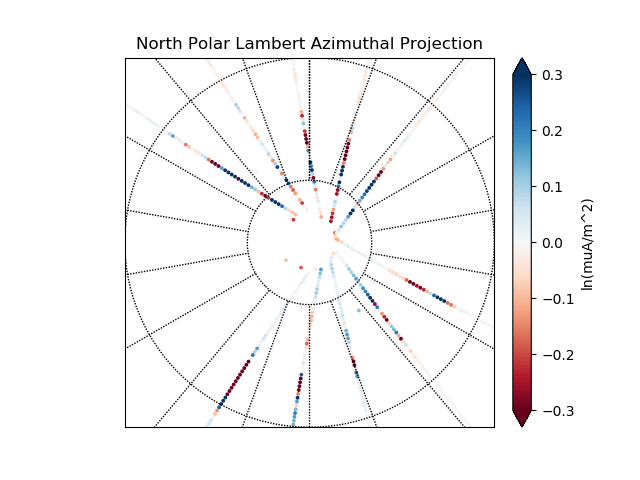

Text(0.5,1,'North Polar Lambert Azimuthal Projection')

In [21]:
rate = 10
plt.figure()
# setup north polar lambert azimuthal basemap.
# The longitude lon_0 is at 6-o'clock, and the
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0.
m = Basemap(projection='nplaea',boundinglat=60,lon_0=0,resolution='c')
#m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
# draw tissot's indicatrix to show distortion.

area = 3*np.ones(len(plot_data.Longitude.values[::rate]))
colors = plot_data.FAC.values[::rate]
x,y = m(plot_data.Longitude.values[::rate], plot_data.Latitude.values[::rate])




cs= m.scatter(x, y, s=area, c=colors,cmap ='RdBu',alpha=1)

# add colorbar.
cbar = m.colorbar(cs,location='right',pad="5%",extend='both')
plt.clim(-0.3, 0.3);
cbar.set_label('ln(muA/m^2)')

plt.title("North Polar Lambert Azimuthal Projection")

<IPython.core.display.Javascript object>


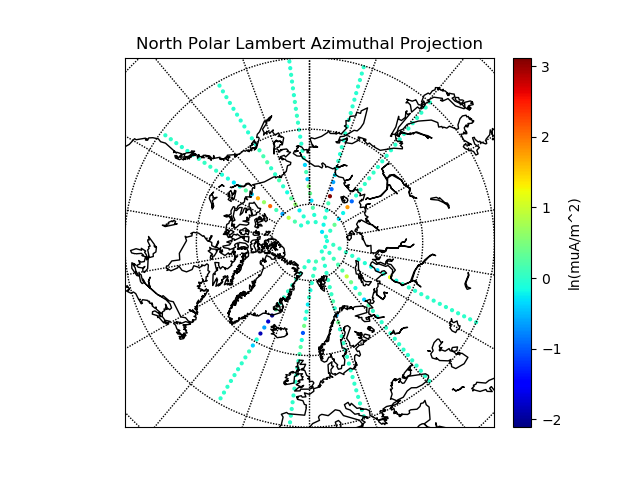

Text(0.5,1,'North Polar Lambert Azimuthal Projection')

In [22]:
rate = 30
plt.figure()
# setup north polar lambert azimuthal basemap.
# The longitude lon_0 is at 6-o'clock, and the
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0.
m = Basemap(projection='nplaea',boundinglat=40,lon_0=0,resolution='c')
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
# draw tissot's indicatrix to show distortion.

area = 4*np.ones(len(orbit_values.Longitude.values[::rate]))
colors = orbit_values.FAC.values[::rate]
x,y = m(orbit_values.Longitude.values[::rate], orbit_values.Latitude.values[::rate])




cs= m.scatter(x, y, s=area, c=colors,cmap ='jet')

# add colorbar.
cbar = m.colorbar(cs,location='right',pad="5%")
cbar.set_label('ln(muA/m^2)')

plt.title("North Polar Lambert Azimuthal Projection")

### Corrolation

In [25]:
Half_orbit.iloc[:,[0,1,6,4]].corr()

,FAC,Density,F10_INDEX,AP_INDEX
FAC,1.000000,0.575253,-0.153076,0.763837
Density,0.575253,1.000000,0.238567,0.632549
F10_INDEX,-0.153076,0.238567,1.000000,-0.258368
AP_INDEX,0.763837,0.632549,-0.258368,1.000000


In [18]:
len(Half_orbit.FAC_A.values)

951

In [19]:
len(Half_orbit.FAC_A.values[10:-10])

931

<IPython.core.display.Javascript object>


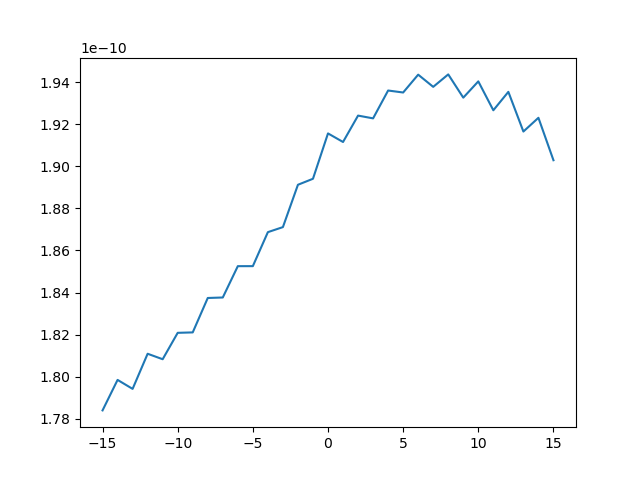

In [21]:
corr_FACA_DNS=signal.correlate(Half_orbit.Density.values,Half_orbit.FAC_A.values[15:-15],mode='valid')

plt.figure()

plt.plot((np.array(range(len(corr_FACA_DNS)))-(len(corr_FACA_DNS)-1)/2),corr_FACA_DNS)

<IPython.core.display.Javascript object>


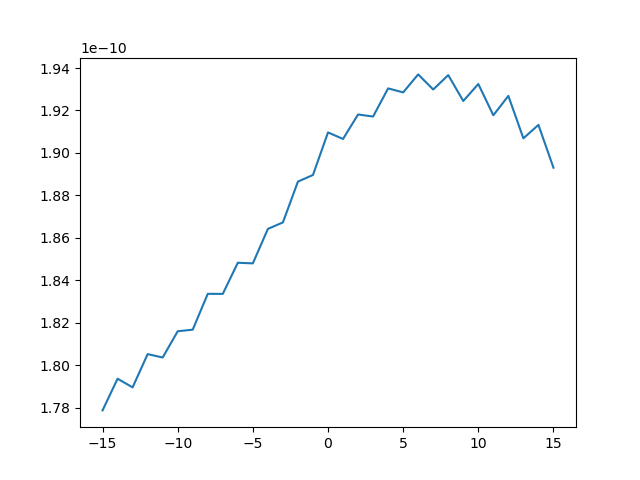

In [22]:
corr_FACC_DNS=signal.correlate(Half_orbit.Density.values,Half_orbit.FAC_C.values[15:-15],mode='valid')

plt.figure()

plt.plot((np.array(range(len(corr_FACC_DNS)))-(len(corr_FACC_DNS)-1)/2),corr_FACC_DNS)

<IPython.core.display.Javascript object>


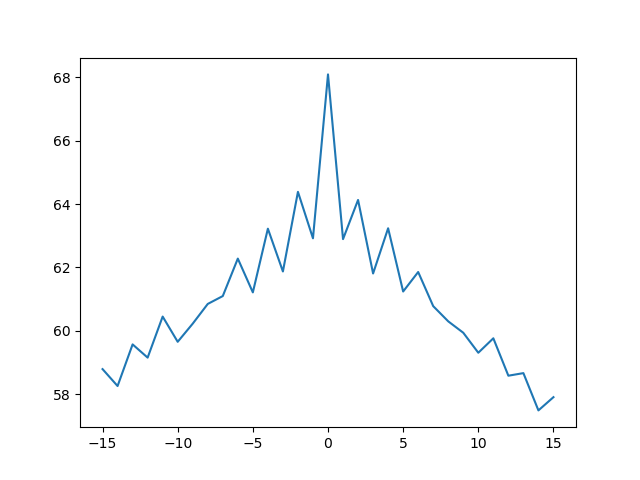

In [23]:
corr_FAC=signal.correlate(Half_orbit.FAC_A.values,Half_orbit.FAC_C.values[15:-15],mode='valid')

plt.figure()

plt.plot((np.array(range(len(corr_FAC)))-(len(corr_FAC)-1)/2),corr_FAC)

<IPython.core.display.Javascript object>


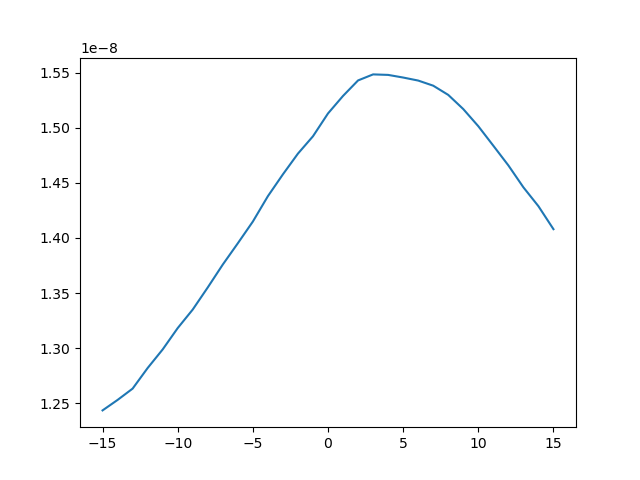

In [24]:
corr_DNS_ap=signal.correlate(Half_orbit.Density.values,Half_orbit.AP_INDEX.values[15:-15],mode='valid')

plt.figure()

plt.plot((np.array(range(len(corr_DNS_ap)))-(len(corr_DNS_ap)-1)/2),corr_DNS_ap)

<IPython.core.display.Javascript object>


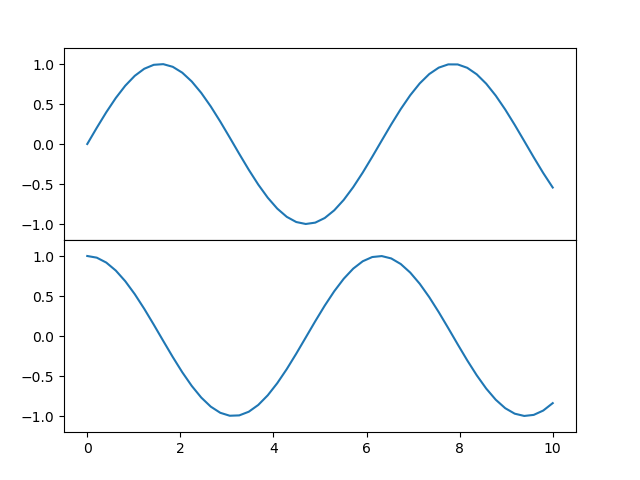

In [44]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(x,np.cos(x));
